<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | SQL: Trabalhando com Múltiplas Tabelas
Caderno de **Aula**<br> 
Professor [Mariane Neiva](www.linkedin.com/in/mariane-neiva)

---

# **Tópicos**

<ol type="1">
  <li>Union;</li>
  <li>Junções: inner / cross;</li>
  <li>Junções: left / right;</li>
</ol>

---

# **Aulas**

Nessa aula, usaremos a seguinte tabela:

```sql
CREATE TABLE transacoes (
  id_cliente INT, 
  id_transacao INT,
  data_compra DATE,
  valor FLOAT, 
  id_loja varchar(25)
);
```

Também temos os seguintes valores inseridos na tabela

```sql
INSERT INTO transacoes VALUES (1,768805383,'2021-06-10',50.74,'magalu');
INSERT INTO transacoes VALUES (2,768805399,'2021-06-13',30.90,'giraffas');
INSERT INTO transacoes VALUES (3,818770008,'2021-06-05',110.00,'postoshell');
INSERT INTO transacoes VALUES (1,76856563,'2021-07-10',2000.90,'magalu');
INSERT INTO transacoes VALUES (1,767573759,'2021-06-20',15.70,'subway');
INSERT INTO transacoes VALUES (3,818575758,'2021-06-25',2.99,'seveneleven');
INSERT INTO transacoes VALUES (4,764545534,'2021-07-11',50.74,'extra');
INSERT INTO transacoes VALUES (5,76766789,'2021-08-02',10.00,'subway');
INSERT INTO transacoes VALUES (3,8154567758,'2021-08-15',1100.00,'shopee');
```

Como resultado da função SELECT, temos a seguinte tabela:

| id_cliente | id_transacao | data_compra |valor | id_loja |
|------------|----------|----|-----| ------- |
| 1| 768805383    | 2021-06-10    | 50.74 |magalu 
| 2 | 768805399    | 2021-06-13    |  30.90 | giraffas 
| 3 | 818770008    |2021-06-05   |  110.00 |  postoshell  
|1 |76856563 | 2021-07-10 |2000.90 |magalu
|1|767573759|2021-06-20|15.70|subway
| 3|818575758|2021-06-25|2.99|seveneleven
 |4|764545534|2021-07-10|50.74|extra
|5|76766789|2021-08-92|10.00|subway
|3|8154567758|2021-08-15|1100.00|shopee 

Além disso, também utilizaremos a tabela:

```sql
CREATE TABLE cliente (
  id_cliente INT,  
  nome varchar(25),
  data_compra DATE,
  valor_compra float, 
  loja_cadastro varchar(25)
);
```

Teremos os seguintes dados na tabela:

```sql
INSERT INTO cliente VALUES (5,'jose', '2020-07-01',500.43,'cea');
INSERT INTO cliente VALUES (1,'maria','2019-03-02',150.70,'riachuelo');
INSERT INTO cliente VALUES (2,'valentina','2020-01-09',210.99,'zara');
INSERT INTO cliente VALUES (4,'joana','2019-05-11',1300.50,'pontofrio');
INSERT INTO cliente VALUES (6,'fernando','2020-03-02',86.55,'pontofrio'); 
```

Como resultado temos:

|id_cliente|nome|data_compra|valor_compra|loja_cadastro|
|-|-|-|-|-|
|5|jose|2020-07-01|500.43|cea|
|1|maria|2019-03-02|150.70|riachuelo|
|2|valentina|2020-01-09|210.99|zara|
|4|joana|2019-05-11|1300.50|pontofrio|
|6|fernando|2020-03-02|86.55|pontofrio|

#1. Função UNION

A função UNION combina colunas e mostra os valores das colunas sequencialmente. 

A função é utilizada junto com a função SELECT e estabelece algumas regras:


1.   As seleções devem possuir o mesmo número de colunas
2.   As colunas combinadas possuem o mesmo tipo de dado

No SQL Server:

```sql
SELECT <colunas1> FROM <tabela1>
UNION
SELECT <colunas2>  FROM <tabela2>;
```

No exemplo

```sql
SELECT id_cliente FROM transacoes
UNION
SELECT id_cliente  FROM cliente;
```

Resultado:

|id_cliente|
|----------| 
|1|
|2|
|3|
|4|
|5|
|6|


Pelo resultado anterior, é possível reparar que os valores não se repetem. Mesmo que a tabela transações mostre id_cliente = 1 em três linhas, a seleção com UNION mostra o valor apenas uma vez. 

Para mostrar todos os valores, use **UNION ALL** ao invés de **UNION**

# 2. **Junções: inner / cross**




Lembra da união de conjuntos da matemática? Revisitaremos nessa aula.

## 2.1 Função inner

A função inner mostra as informações comuns em duas seleções. Para ilustrar podemos observar a imagem abaixo:

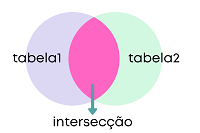


Para utilizar a função:
```sql
SELECT <colunas>
FROM <tabela1>
INNER JOIN <tabela2>
ON <tabela1>.<coluna> = <tabela2>.<coluna>;
``` 

No exemplo:

```sql
SELECT transacoes.id_cliente, cliente.nome
FROM transacoes
INNER JOIN cliente
ON transacoes.id_cliente = cliente.id_cliente;
```

Resultado:

|id_cliente|nome|
|-----|-----|
|1|maria|
|2|valentina|
|1|maria|
|1|maria|
|4|joana
|5|jose|



## 2.2 Função cross

A função cross realiza um cruzamento de dados de duas tabela. É possível unir todas as informações de uma tabela a outra como veremos no exemplo.

```sql
SELECT <colunas>
FROM <tabela1>
CROSS JOIN <tabela2>
```

No exemplo:
```sql
SELECT *
FROM cliente
CROSS JOIN transacoes
```

Parte do resultado: [clique aqui](https://drive.google.com/file/d/1nwjHByagyfL3R2gQm2ALQMverAVmk75J/view?usp=sharing) 



# **3. Junções: left / right**

Nesses dois modelos de junção, todas os dados selecionados de uma tabela serão mostrado enquanto apenas os dados comuns de outra serão selecionados. 

Vamos entender.

##3.1 Junção left

Verifique a imagem abaixo:

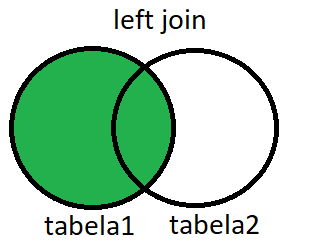

Nesse modelo, todos os dados da **tabela1** são mostrados enquanto apenas os dados da tabela2 que são comuns as duas tabelas são mostrados.

No SQL Server: 

```sql
SELECT <colunas>
FROM <tabela1>
LEFT JOIN <tabela2>
ON <tabela1>.<nomecolunacomum> = <tabela2>.<nomecolunacomum>;
```

Exemplo:


```sql
SELECT *
FROM transacoes
LEFT JOIN cliente 
ON cliente.id_cliente = transacoes.id_cliente;
```

Resultado completo: [clique aqui](https://drive.google.com/file/d/1qoGtmKzNhSLME0igLrhoq-B97KaAj3h7/view?usp=sharing)

## 3.2 Junção right

Verifique a imagem abaixo:

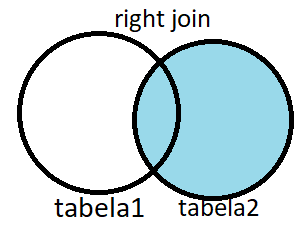

Nesse modelo, todos os dados da **tabela2** são mostrados enquanto apenas os dados da **tabela1** que são comuns as duas tabelas são mostrados.

No SQL Server: 

```sql
SELECT <colunas>
FROM <tabela1>
RIGHT JOIN <tabela2>
ON <tabela1>.<nomecolunacomum> = <tabela2>.<nomecolunacomum>;
```

Exemplo:


```sql
SELECT *
FROM transacoes
RIGHT JOIN cliente 
ON cliente.id_cliente = transacoes.id_cliente;
```

Para ver o resultado: [clique aqui](https://drive.google.com/file/d/1MYKpGh9WW_j-MOVDvPptijTHY5FJSAQG/view?usp=sharing)

> Atenção: o site [SQLiteonline](https://sqliteonline.com/) não possui a função RIGHT JOIN